In [3]:
import json

with open('dataset/llava/metadata.json', 'r', encoding='utf-8') as f:
    metadata = json.load(f)

print(f'Type: {type(metadata)}')
if isinstance(metadata, list):
    print(f'Length: {len(metadata)}')
    print(f'First item: {metadata[0]}')
elif isinstance(metadata, dict):
    print(f'Keys: {metadata.keys()}')
else:
    print(f'Metadata is neither a list nor a dict')


Type: <class 'list'>
Length: 595375
First item: {'id': 'GCC_train_002582585', 'image': 'GCC_train_002582585.jpg', 'caption': 'olive oil is a healthy ingredient used liberally .', 'blip_caption': 'some olive oil and salt in a glass bottle', 'url': 'https://i.pinimg.com/736x/de/13/3a/de133a155c777a9db265bb3e7888719d--colombo-olive-oils.jpg'}


In [13]:
sample_1 = metadata[0]
for key, value in sample_1.items():
    print(f'{key}: {value}')

sample_2 = metadata[1]
for key, value in sample_2.items():
    print(f'{key}: {value}')


id: GCC_train_002582585
image: GCC_train_002582585.jpg
caption: olive oil is a healthy ingredient used liberally .
blip_caption: some olive oil and salt in a glass bottle
url: https://i.pinimg.com/736x/de/13/3a/de133a155c777a9db265bb3e7888719d--colombo-olive-oils.jpg
id: GCC_train_002429825
image: GCC_train_002429825.jpg
caption: 3d vector deluxe alphabet of randomly rotated thin golden symbols .
blip_caption: the number three thousand gold on a dark background
url: https://thumb9.shutterstock.com/display_pic_with_logo/177637/321012236/stock-vector--d-vector-deluxe-alphabet-of-randomly-rotated-thin-golden-symbols-all-symbols-in-set-have-random-321012236.jpg


In [5]:
with open('dataset/llava/chat.json', 'r', encoding='utf-8') as f:
    chat = json.load(f)
    
print(f'Type: {type(chat)}')

Type: <class 'list'>


In [6]:
chat_sample_1 = chat[0]
for key, value in chat_sample_1.items():
    print(f'{key}: {value}')

chat_sample_2 = chat[1]
for key, value in chat_sample_2.items():
    print(f'{key}: {value}')
    print(f'Type: {type(value)}')

id: GCC_train_002582585
image: GCC_train_002582585.jpg
conversations: [{'from': 'human', 'value': 'Provide a brief description of the given image.\n<image>'}, {'from': 'gpt', 'value': 'olive oil is a healthy ingredient used liberally .'}]
id: GCC_train_002429825
Type: <class 'str'>
image: GCC_train_002429825.jpg
Type: <class 'str'>
conversations: [{'from': 'human', 'value': '<image>\nWrite a terse but informative summary of the picture.'}, {'from': 'gpt', 'value': '3d vector deluxe alphabet of randomly rotated thin golden symbols .'}]
Type: <class 'list'>


In [16]:
import pandas as pd

metadata_df = pd.DataFrame(metadata)
chat_df = pd.DataFrame(chat)

merge_df = pd.merge(metadata_df, chat_df, on=['id', 'image'], how='inner')
merge_df.head()

# Save the merged dataframe to a csv file
merge_df.to_csv('merged_data.csv', index=False)

In [17]:
merge_df.head()

,id,image,caption,blip_caption,url,conversations
0,GCC_train_002582585,GCC_train_002582585.jpg,olive oil is a healthy ingredient used liberal...,some olive oil and salt in a glass bottle,https://i.pinimg.com/736x/de/13/3a/de133a155c7...,"[{'from': 'human', 'value': 'Provide a brief d..."
1,GCC_train_002429825,GCC_train_002429825.jpg,3d vector deluxe alphabet of randomly rotated ...,the number three thousand gold on a dark backg...,https://thumb9.shutterstock.com/display_pic_wi...,"[{'from': 'human', 'value': '<image> Write a t..."
2,GCC_train_000190697,GCC_train_000190697.jpg,weathering -- the physical & chemical breakdow...,None,http://slideplayer.com/9374162/28/images/2/Wea...,"[{'from': 'human', 'value': 'Share a concise i..."
3,GCC_train_002503829,GCC_train_002503829.jpg,fans interferes with # on a ball hit by # of s...,None,https://media.gettyimages.com/photos/fans-inte...,"[{'from': 'human', 'value': 'Relay a brief, cl..."
4,GCC_train_000530863,GCC_train_000530863.jpg,train that takes you around the perimeter,the train ride at the park,https://media-cdn.tripadvisor.com/media/photo-...,"[{'from': 'human', 'value': '<image> Render a ..."


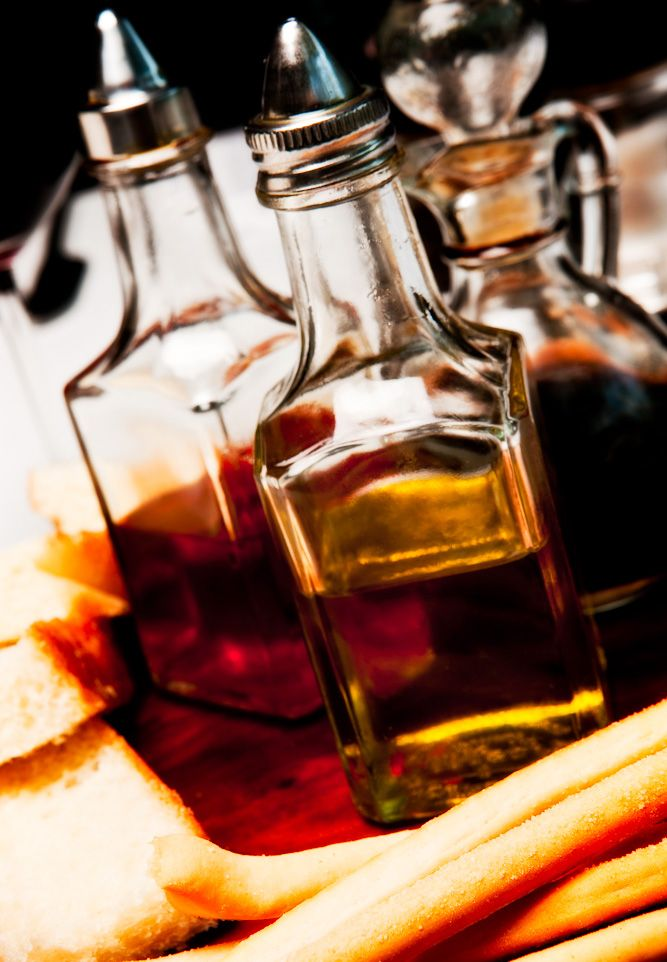

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = sample_1.get('url')
response = requests.get(url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    display(image)
else:
    print(f'Failed to download image from {url}')
